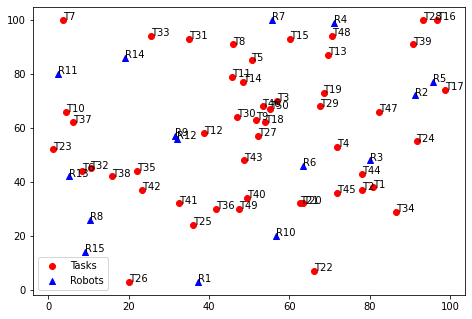

In [156]:
list_tasks = {'T1': (80.88147193690499, 38),
 'T2': (78.10548599619733, 37),
 'T3': (56.8176146374026, 70),
 'T4': (71.82255047676631, 53),
 'T5': (50.57013243716313, 85),
 'T6': (8.487020827987346, 44),
 'T7': (3.687324876871634, 100),
 'T8': (46.036596968210276, 91),
 'T9': (51.739543589066464, 63),
 'T10': (4.4709542768266335, 66),
 'T11': (45.76457021042237, 79),
 'T12': (38.777878883708475, 58),
 'T13': (69.64960295397435, 87),
 'T14': (48.48684975493916, 77),
 'T15': (60.1381733683944, 93),
 'T16': (96.79707555124712, 100),
 'T17': (98.7827657800577, 74),
 'T18': (54.044844675854705, 62),
 'T19': (68.47999943000718, 73),
 'T20': (63.33439774634873, 32),
 'T21': (62.74856924245211, 32),
 'T22': (66.01759734839521, 7),
 'T23': (1.1471855451022805, 52),
 'T24': (91.59190748689802, 55),
 'T25': (35.93284333519174, 24),
 'T26': (20.083137768266024, 3),
 'T27': (52.17236559757006, 57),
 'T28': (93.27819802845372, 100),
 'T29': (67.51522084747941, 68),
 'T30': (47.04049877673236, 64),
 'T31': (35.02137569578472, 93),
 'T32': (10.545883091737485, 45),
 'T33': (25.57265259651773, 94),
 'T34': (86.60755981495221, 29),
 'T35': (22.144407883961147, 44),
 'T36': (41.672688192694494, 30),
 'T37': (6.099921575386991, 62),
 'T38': (15.963149657443354, 42),
 'T39': (90.82048384733025, 91),
 'T40': (49.55579393454589, 34),
 'T41': (32.444862051741865, 32),
 'T42': (23.28872500249829, 37),
 'T43': (48.80234433062056, 48),
 'T44': (78.03931365092028, 43),
 'T45': (71.76874711716896, 36),
 'T46': (53.314887016819725, 68),
 'T47': (82.36458166940965, 66),
 'T48': (70.56753954274501, 94),
 'T49': (47.56847753653343, 30),
 'T50': (55.17533177803523, 67)}
list_robots = {'R1': (37.26191821043129, 3),
 'R2': (91.12863440416477, 72),
 'R3': (80, 48),
 'R4': (70.97440611196498, 99),
 'R5': (95.67771224753184, 77),
 'R6': (63.32196933581883, 46),
 'R7': (55.56998647202327, 100),
 'R8': (10.43861187575147, 26),
 'R9': (31.445674622001697, 57),
 'R10': (56.75671158884044, 20),
 'R11': (2.4482597933774275, 80),
 'R12': (32.15349849473439, 56),
 'R13': (5.184133057595042, 42),
 'R14': (19.00093887716302, 86),
 'R15': (9.14072554853348, 14)}
xs = [x[0] for x in list_tasks.values()]
ys = [x[1] for x in list_tasks.values()]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(xs, ys,marker="o", color="red",label='Tasks')
for i in range(len(xs)):
  ax.annotate('T'+str(i+1), (xs[i], ys[i]))
xs = [x[0] for x in list_robots.values()]
ys = [x[1] for x in list_robots.values()]
ax.scatter(xs, ys,marker="^", color="blue",label='Robots')
for i in range(len(xs)):
  ax.annotate('R'+str(i+1), (xs[i], ys[i]))
plt.legend()
plt.show()

### **Code Source**

In [157]:
import math
def best_robot_within_2_conflict(L,task_position,alpha,beta,gamma,d_max,T_max) : 
  Robot1 = list_robots[L[0][0]]
  Robot2 = list_robots[L[1][0]]
  t1 = L[0][1]
  t2 = L[1][1]
  b1 = list_battery[L[0][0]] 
  b2 = list_battery[L[1][0]]
  u1 = utiliy4(alpha, beta ,gamma,Robot1,task_position,t1,b1,Robot2,task_position,t2,b2,d_max,T_max) # R1 <- A et R2 <- A
  u2 = utiliy4(alpha, beta ,gamma,Robot1,task_position,t1,b1,Robot2,0,t2,b2,d_max,T_max)# R1 <- A et R2 <- repos
  u3 = utiliy4(alpha, beta , gamma,Robot1,0,t1,b1,Robot2,task_position,t2,b2,d_max,T_max) # R1 <- repos et R2 <- A
  u4 = utiliy4(alpha, beta , gamma,Robot1,0,t1,b1,Robot2,0,t2,b2,d_max,T_max) # R1 <- repos et R2 <- repos
  u1 = sum(list(u1))
  u2 = sum(list(u2))
  u3 = sum(list(u3))
  u4 = sum(list(u4))
  a_list = [u1,u2,u3,u4]
  max_value = max(a_list)
  max_index = a_list.index(max_value)
  #Nash
  if max_index == 1 :
    return L[0][0]
  else :
    return L[1][0]

In [158]:
import math
from matplotlib import pyplot as plt
def general_func(alpha, beta, gamma,list_tasks,list_battery,list_robots,list_allocation,T_max,d_max) : 
  allocation = {}
  distance_totale = 0
  temps_totale=0 
  consommation_battery = 0
  for i in list_tasks.keys():
    if len(list_allocation[i])==1 : 
      allocation[i] = list_allocation[i][0][0]
      temps_totale += list_allocation[i][0][1]
      rob = list_robots[list_allocation[i][0][0]]
      tsk = list_tasks[i]
      distance_parcourue = math.sqrt( (rob[0] - tsk[0])**2 + (rob[1] - tsk[1])**2 )
      distance_totale += distance_parcourue
      list_robots[list_allocation[i][0]]  = list_tasks[i]
      list_battery[list_allocation[i][0][0]] =list_battery[list_allocation[i][0][0]] - 5  
    else : 
      L = list_allocation[i]
      Robot1 = list_robots[L[0][0]]
      Robot2 = list_robots[L[1][0]]
      t1 = L[0][1]
      t2 = L[1][1]
      task_position = list_tasks[i]
      b1 = list_battery[L[0][0]] 
      b2 = list_battery[L[1][0]]
      n = len(L)
      A = L
      while len(A)> 1 :
        H = [A[0],A[1]]
        R = best_robot_within_2_conflict(H,task_position,alpha,beta,gamma,T_max,d_max)
        if A[0][0] == R :
          A.pop(1)
        else :
          A.pop(0)
      for index in range(len(L)) : 
        if L[index][0] == R :
          break
      allocation[i] = R
      temps_totale += L[index][1]
      rob = list_robots[R]
      tsk = list_tasks[i]
      distance_parcourue = math.sqrt( (rob[0] - tsk[0])**2 + (rob[1] - tsk[1])**2 )
      distance_totale += distance_parcourue
      list_robots[R]  = list_tasks[i]
      list_battery[R] =list_battery[R] - 5
  for i in allocation.values() :
    consommation_battery += list_battery[i]
  return (allocation,distance_totale,temps_totale,consommation_battery)

In [159]:
def utiliy4(alpha, beta ,gamma, Robot1,Task1,t1,b1,Robot2,Task2,t2,b2, d_max,Tmax):
  if Task1==0 and  Task2==0 :
    return (0,0)
  if Task1==Task2 :
    return (-1,-1)
  elif Task1==0 :
    distance_robot2_task2 = 4- (beta* math.sqrt( (Robot2[0] - Task2[0])**2 + (Robot2[1] - Task2[1])**2 ))/d_max
    u=distance_robot2_task2-alpha*t2/Tmax + gamma* b2/100 
    return (0,u)
  elif Task2==0 :
    distance_robot1_task1 = 4- ( beta*math.sqrt( (Robot1[0] - Task1[0])**2 + (Robot1[1] - Task1[1])**2 ))/d_max
    u=distance_robot1_task1-alpha*t1/Tmax + gamma*b1/100
    return (u,0)
  else :
    u1 = 4-(beta*math.sqrt( (Robot1[0] - Task1[0])**2 + (Robot1[1] - Task1[1])**2 ))/d_max -alpha*t1/Tmax + gamma* b1/100 
    u2 = 4- (beta*math.sqrt( (Robot2[0] - Task2[0])**2 + (Robot2[1] - Task2[1])**2 ))/d_max -alpha*t2/Tmax + gamma* b2/100
    return (u1,u2)

In [160]:
import numpy as np
latency_max = 1
d_max = 100
T_max = 100
list_tasks = {'T1': (80.88147193690499, 38),
 'T2': (78.10548599619733, 37),
 'T3': (56.8176146374026, 70),
 'T4': (71.82255047676631, 53),
 'T5': (50.57013243716313, 85),
 'T6': (8.487020827987346, 44),
 'T7': (3.687324876871634, 100),
 'T8': (46.036596968210276, 91),
 'T9': (51.739543589066464, 63),
 'T10': (4.4709542768266335, 66),
 'T11': (45.76457021042237, 79),
 'T12': (38.777878883708475, 58),
 'T13': (69.64960295397435, 87),
 'T14': (48.48684975493916, 77),
 'T15': (60.1381733683944, 93),
 'T16': (96.79707555124712, 100),
 'T17': (98.7827657800577, 74),
 'T18': (54.044844675854705, 62),
 'T19': (68.47999943000718, 73),
 'T20': (63.33439774634873, 32),
 'T21': (62.74856924245211, 32),
 'T22': (66.01759734839521, 7),
 'T23': (1.1471855451022805, 52),
 'T24': (91.59190748689802, 55),
 'T25': (35.93284333519174, 24),
 'T26': (20.083137768266024, 3),
 'T27': (52.17236559757006, 57),
 'T28': (93.27819802845372, 100),
 'T29': (67.51522084747941, 68),
 'T30': (47.04049877673236, 64),
 'T31': (35.02137569578472, 93),
 'T32': (10.545883091737485, 45),
 'T33': (25.57265259651773, 94),
 'T34': (86.60755981495221, 29),
 'T35': (22.144407883961147, 44),
 'T36': (41.672688192694494, 30),
 'T37': (6.099921575386991, 62),
 'T38': (15.963149657443354, 42),
 'T39': (90.82048384733025, 91),
 'T40': (49.55579393454589, 34),
 'T41': (32.444862051741865, 32),
 'T42': (23.28872500249829, 37),
 'T43': (48.80234433062056, 48),
 'T44': (78.03931365092028, 43),
 'T45': (71.76874711716896, 36),
 'T46': (53.314887016819725, 68),
 'T47': (82.36458166940965, 66),
 'T48': (70.56753954274501, 94),
 'T49': (47.56847753653343, 30),
 'T50': (55.17533177803523, 67)}
list_robots = {'R1': (37.26191821043129, 3),
 'R2': (91.12863440416477, 72),
 'R3': (80, 48),
 'R4': (70.97440611196498, 99),
 'R5': (95.67771224753184, 77),
 'R6': (63.32196933581883, 46),
 'R7': (55.56998647202327, 100),
 'R8': (10.43861187575147, 26),
 'R9': (31.445674622001697, 57),
 'R10': (56.75671158884044, 20),
 'R11': (2.4482597933774275, 80),
 'R12': (32.15349849473439, 56),
 'R13': (5.184133057595042, 42),
 'R14': (19.00093887716302, 86),
 'R15': (9.14072554853348, 14)}
list_allocation = {'T1': [('R3', 96),('R2', 96)],
 'T2': [('R9', 43)],
 'T3': [('R6', 35)],
 'T4': [('R5', 23)],
 'T5': [('R3', 0)],
 'T6': [('R13', 28), ('R3', 63),('R5', 96)],
 'T7': [('R12', 100)],
 'T8': [('R15', 39), ('R10', 26)],
 'T9': [('R10', 80), ('R4', 95)],
 'T10': [('R10', 1), ('R10', 39)],
 'T11': [('R12', 62), ('R2', 28)],
 'T12': [('R6', 18), ('R10', 38)],
 'T13': [('R3', 18)],
 'T14': [('R5', 74)],
 'T15': [('R13', 18)],
 'T16': [('R14', 66)],
 'T17': [('R8', 70), ('R2', 46),('R5', 96)],
 'T18': [('R4', 16), ('R2', 64)],
 'T19': [('R12', 76), ('R11', 93)],
 'T20': [('R3', 46), ('R13', 2)],
 'T21': [('R12', 67), ('R9', 61)],
 'T22': [('R14', 53)],
 'T23': [('R3', 43)],
 'T24': [('R2', 94)],
 'T25': [('R8', 87), ('R3', 74)],
 'T26': [('R7', 31)],
 'T27': [('R2', 33)],
 'T28': [('R3', 97), ('R2', 73)],
 'T29': [('R13', 81), ('R4', 57)],
 'T30': [('R13', 66)],
 'T31': [('R9', 37)],
 'T32': [('R3', 77)],
 'T33': [('R2', 23)],
 'T34': [('R9', 35), ('R13', 83)],
 'T35': [('R2', 89)],
 'T36': [('R10', 3)],
 'T37': [('R1', 86), ('R3', 11)],
 'T38': [('R12', 98), ('R1', 50)],
 'T39': [('R7', 6)],
 'T40': [('R14', 22), ('R6', 50)],
 'T41': [('R7', 90)],
 'T42': [('R3', 39)],
 'T43': [('R7', 84)],
 'T44': [('R3', 98)],
 'T45': [('R4', 0)],
 'T46': [('R15', 31)],
 'T47': [('R15', 18)],
 'T48': [('R10', 58)],
 'T49': [('R1', 85), ('R3', 75)],
 'T50': [('R2', 18), ('R7', 83)]}

list_battery = {'R1': 6,
 'R2': 33, 'R3': 33, 'R4': 82, 'R5': 5, 'R6': 85,
 'R7': 49,
 'R8': 28,
 'R9': 69,
 'R10': 16,
 'R11': 67,
 'R12': 23,
 'R13': 96,
 'R14': 1,
 'R15': 67}
general_func(0.33,0.33,0.33,list_tasks,list_battery,list_robots,list_allocation,T_max,d_max)

({'T1': 'R3',
  'T2': 'R9',
  'T3': 'R6',
  'T4': 'R5',
  'T5': 'R3',
  'T6': 'R13',
  'T7': 'R12',
  'T8': 'R15',
  'T9': 'R4',
  'T10': 'R10',
  'T11': 'R2',
  'T12': 'R6',
  'T13': 'R3',
  'T14': 'R5',
  'T15': 'R13',
  'T16': 'R14',
  'T17': 'R2',
  'T18': 'R4',
  'T19': 'R11',
  'T20': 'R13',
  'T21': 'R9',
  'T22': 'R14',
  'T23': 'R3',
  'T24': 'R2',
  'T25': 'R8',
  'T26': 'R7',
  'T27': 'R2',
  'T28': 'R2',
  'T29': 'R4',
  'T30': 'R13',
  'T31': 'R9',
  'T32': 'R3',
  'T33': 'R2',
  'T34': 'R9',
  'T35': 'R2',
  'T36': 'R10',
  'T37': 'R3',
  'T38': 'R1',
  'T39': 'R7',
  'T40': 'R6',
  'T41': 'R7',
  'T42': 'R3',
  'T43': 'R7',
  'T44': 'R3',
  'T45': 'R4',
  'T46': 'R15',
  'T47': 'R15',
  'T48': 'R10',
  'T49': 'R1',
  'T50': 'R2'},
 2458.9298692045063,
 2339,
 1188)

**Grahpes**

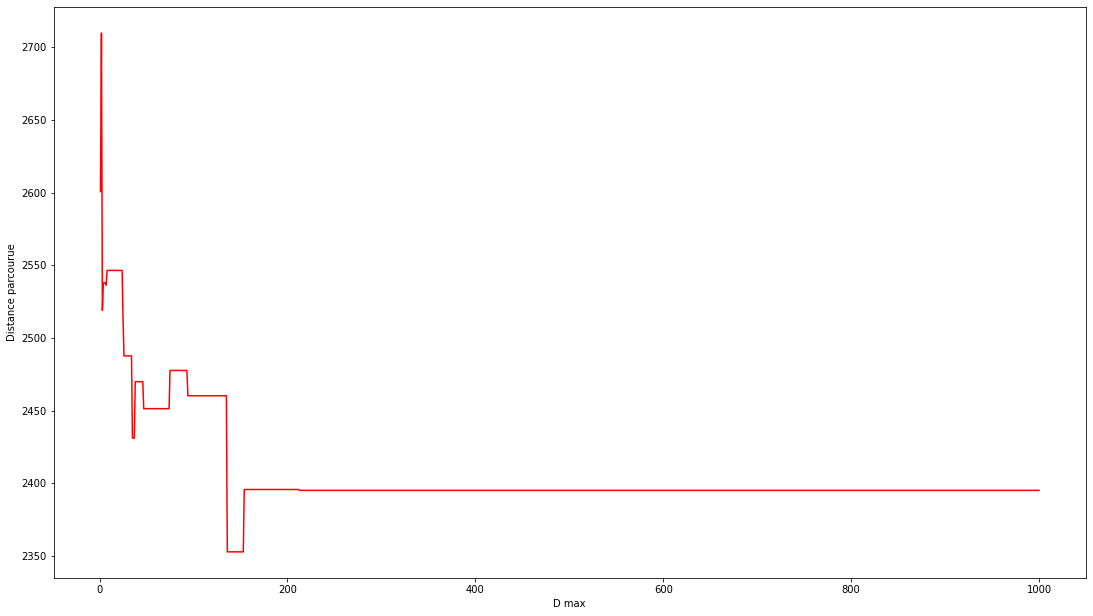

In [163]:
import numpy as np
x = np.linspace(1,1000,1000)
y = []
T_max = 100
for i in x :
  list_tasks = {'T1': (80.88147193690499, 38),
 'T2': (78.10548599619733, 37),
 'T3': (56.8176146374026, 70),
 'T4': (71.82255047676631, 53),
 'T5': (50.57013243716313, 85),
 'T6': (8.487020827987346, 44),
 'T7': (3.687324876871634, 100),
 'T8': (46.036596968210276, 91),
 'T9': (51.739543589066464, 63),
 'T10': (4.4709542768266335, 66),
 'T11': (45.76457021042237, 79),
 'T12': (38.777878883708475, 58),
 'T13': (69.64960295397435, 87),
 'T14': (48.48684975493916, 77),
 'T15': (60.1381733683944, 93),
 'T16': (96.79707555124712, 100),
 'T17': (98.7827657800577, 74),
 'T18': (54.044844675854705, 62),
 'T19': (68.47999943000718, 73),
 'T20': (63.33439774634873, 32),
 'T21': (62.74856924245211, 32),
 'T22': (66.01759734839521, 7),
 'T23': (1.1471855451022805, 52),
 'T24': (91.59190748689802, 55),
 'T25': (35.93284333519174, 24),
 'T26': (20.083137768266024, 3),
 'T27': (52.17236559757006, 57),
 'T28': (93.27819802845372, 100),
 'T29': (67.51522084747941, 68),
 'T30': (47.04049877673236, 64),
 'T31': (35.02137569578472, 93),
 'T32': (10.545883091737485, 45),
 'T33': (25.57265259651773, 94),
 'T34': (86.60755981495221, 29),
 'T35': (22.144407883961147, 44),
 'T36': (41.672688192694494, 30),
 'T37': (6.099921575386991, 62),
 'T38': (15.963149657443354, 42),
 'T39': (90.82048384733025, 91),
 'T40': (49.55579393454589, 34),
 'T41': (32.444862051741865, 32),
 'T42': (23.28872500249829, 37),
 'T43': (48.80234433062056, 48),
 'T44': (78.03931365092028, 43),
 'T45': (71.76874711716896, 36),
 'T46': (53.314887016819725, 68),
 'T47': (82.36458166940965, 66),
 'T48': (70.56753954274501, 94),
 'T49': (47.56847753653343, 30),
 'T50': (55.17533177803523, 67)}
  list_robots = {'R1': (37.26191821043129, 3),
 'R2': (91.12863440416477, 72),
 'R3': (80, 48),
 'R4': (70.97440611196498, 99),
 'R5': (95.67771224753184, 77),
 'R6': (63.32196933581883, 46),
 'R7': (55.56998647202327, 100),
 'R8': (10.43861187575147, 26),
 'R9': (31.445674622001697, 57),
 'R10': (56.75671158884044, 20),
 'R11': (2.4482597933774275, 80),
 'R12': (32.15349849473439, 56),
 'R13': (5.184133057595042, 42),
 'R14': (19.00093887716302, 86),
 'R15': (9.14072554853348, 14)}
  list_allocation = {'T1': [('R10', 95), ('R3', 96), ('R5', 96), ('R8', 96), ('R6', 96),('R2', 96)],
 'T2': [('R9', 43)],
 'T3': [('R6', 35)],
 'T4': [('R5', 23)],
 'T5': [('R3', 0)],
 'T6': [('R13', 28), ('R3', 63),('R5', 96)],
 'T7': [('R12', 100)],
 'T8': [('R15', 39), ('R10', 26)],
 'T9': [('R10', 80), ('R4', 95)],
 'T10': [('R10', 1), ('R10', 39)],
 'T11': [('R12', 62), ('R2', 28)],
 'T12': [('R6', 18), ('R10', 38)],
 'T13': [('R3', 18)],
 'T14': [('R5', 74)],
 'T15': [('R13', 18)],
 'T16': [('R14', 66)],
 'T17': [('R8', 70), ('R2', 46),('R5', 96)],
 'T18': [('R4', 16), ('R2', 64)],
 'T19': [('R12', 76), ('R11', 93)],
 'T20': [('R3', 46), ('R13', 2)],
 'T21': [('R12', 67), ('R9', 61)],
 'T22': [('R14', 53)],
 'T23': [('R3', 43)],
 'T24': [('R2', 94)],
 'T25': [('R8', 87), ('R3', 74)],
 'T26': [('R7', 31)],
 'T27': [('R2', 33)],
 'T28': [('R3', 97), ('R2', 73)],
 'T29': [('R13', 81), ('R4', 57)],
 'T30': [('R13', 66)],
 'T31': [('R9', 37)],
 'T32': [('R3', 77)],
 'T33': [('R2', 23)],
 'T34': [('R9', 35), ('R13', 83)],
 'T35': [('R2', 89)],
 'T36': [('R10', 3)],
 'T37': [('R1', 86), ('R3', 11)],
 'T38': [('R12', 98), ('R1', 50)],
 'T39': [('R7', 6)],
 'T40': [('R14', 22), ('R6', 50)],
 'T41': [('R7', 90)],
 'T42': [('R3', 39)],
 'T43': [('R7', 84)],
 'T44': [('R3', 98)],
 'T45': [('R4', 0)],
 'T46': [('R15', 31)],
 'T47': [('R15', 18)],
 'T48': [('R10', 58)],
 'T49': [('R1', 85), ('R3', 75)],
 'T50': [('R2', 18), ('R7', 83)]}
  list_battery = {'R1': 6,
 'R2': 12, 'R3': 33, 'R4': 82, 'R5': 5, 'R6': 85,
 'R7': 49,
 'R8': 28,
 'R9': 69,
 'R10': 16,
 'R11': 67,
 'R12': 23,
 'R13': 96,
 'R14': 1,
 'R15': 67}
  di_totale = general_func(0.33,0.33,0.33,list_tasks,list_battery,list_robots,list_allocation,T_max,i)[1]
  y.append(di_totale)
plt.plot(x, y,'r')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('D max')
plt.ylabel('Distance parcourue')
plt.show()

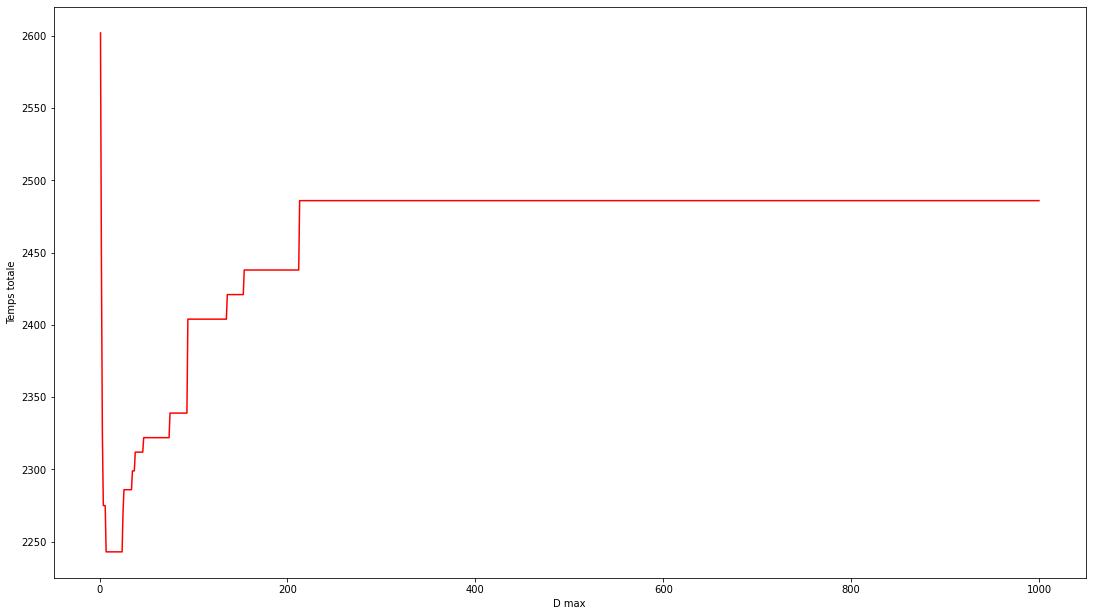

In [162]:
import numpy as np
x = np.linspace(1,1000,1000)
y = []
T_max = 100
for i in x :
  list_tasks = {'T1': (80.88147193690499, 38),
 'T2': (78.10548599619733, 37),
 'T3': (56.8176146374026, 70),
 'T4': (71.82255047676631, 53),
 'T5': (50.57013243716313, 85),
 'T6': (8.487020827987346, 44),
 'T7': (3.687324876871634, 100),
 'T8': (46.036596968210276, 91),
 'T9': (51.739543589066464, 63),
 'T10': (4.4709542768266335, 66),
 'T11': (45.76457021042237, 79),
 'T12': (38.777878883708475, 58),
 'T13': (69.64960295397435, 87),
 'T14': (48.48684975493916, 77),
 'T15': (60.1381733683944, 93),
 'T16': (96.79707555124712, 100),
 'T17': (98.7827657800577, 74),
 'T18': (54.044844675854705, 62),
 'T19': (68.47999943000718, 73),
 'T20': (63.33439774634873, 32),
 'T21': (62.74856924245211, 32),
 'T22': (66.01759734839521, 7),
 'T23': (1.1471855451022805, 52),
 'T24': (91.59190748689802, 55),
 'T25': (35.93284333519174, 24),
 'T26': (20.083137768266024, 3),
 'T27': (52.17236559757006, 57),
 'T28': (93.27819802845372, 100),
 'T29': (67.51522084747941, 68),
 'T30': (47.04049877673236, 64),
 'T31': (35.02137569578472, 93),
 'T32': (10.545883091737485, 45),
 'T33': (25.57265259651773, 94),
 'T34': (86.60755981495221, 29),
 'T35': (22.144407883961147, 44),
 'T36': (41.672688192694494, 30),
 'T37': (6.099921575386991, 62),
 'T38': (15.963149657443354, 42),
 'T39': (90.82048384733025, 91),
 'T40': (49.55579393454589, 34),
 'T41': (32.444862051741865, 32),
 'T42': (23.28872500249829, 37),
 'T43': (48.80234433062056, 48),
 'T44': (78.03931365092028, 43),
 'T45': (71.76874711716896, 36),
 'T46': (53.314887016819725, 68),
 'T47': (82.36458166940965, 66),
 'T48': (70.56753954274501, 94),
 'T49': (47.56847753653343, 30),
 'T50': (55.17533177803523, 67)}
  list_robots = {'R1': (37.26191821043129, 3),
 'R2': (91.12863440416477, 72),
 'R3': (80, 48),
 'R4': (70.97440611196498, 99),
 'R5': (95.67771224753184, 77),
 'R6': (63.32196933581883, 46),
 'R7': (55.56998647202327, 100),
 'R8': (10.43861187575147, 26),
 'R9': (31.445674622001697, 57),
 'R10': (56.75671158884044, 20),
 'R11': (2.4482597933774275, 80),
 'R12': (32.15349849473439, 56),
 'R13': (5.184133057595042, 42),
 'R14': (19.00093887716302, 86),
 'R15': (9.14072554853348, 14)}
  list_allocation = {'T1': [('R10', 95), ('R3', 96), ('R5', 96), ('R8', 96), ('R6', 96),('R2', 96)],
 'T2': [('R9', 43)],
 'T3': [('R6', 35)],
 'T4': [('R5', 23)],
 'T5': [('R3', 0)],
 'T6': [('R13', 28), ('R3', 63),('R5', 96)],
 'T7': [('R12', 100)],
 'T8': [('R15', 39), ('R10', 26)],
 'T9': [('R10', 80), ('R4', 95)],
 'T10': [('R10', 1), ('R10', 39)],
 'T11': [('R12', 62), ('R2', 28)],
 'T12': [('R6', 18), ('R10', 38)],
 'T13': [('R3', 18)],
 'T14': [('R5', 74)],
 'T15': [('R13', 18)],
 'T16': [('R14', 66)],
 'T17': [('R8', 70), ('R2', 46),('R5', 96)],
 'T18': [('R4', 16), ('R2', 64)],
 'T19': [('R12', 76), ('R11', 93)],
 'T20': [('R3', 46), ('R13', 2)],
 'T21': [('R12', 67), ('R9', 61)],
 'T22': [('R14', 53)],
 'T23': [('R3', 43)],
 'T24': [('R2', 94)],
 'T25': [('R8', 87), ('R3', 74)],
 'T26': [('R7', 31)],
 'T27': [('R2', 33)],
 'T28': [('R3', 97), ('R2', 73)],
 'T29': [('R13', 81), ('R4', 57)],
 'T30': [('R13', 66)],
 'T31': [('R9', 37)],
 'T32': [('R3', 77)],
 'T33': [('R2', 23)],
 'T34': [('R9', 35), ('R13', 83)],
 'T35': [('R2', 89)],
 'T36': [('R10', 3)],
 'T37': [('R1', 86), ('R3', 11)],
 'T38': [('R12', 98), ('R1', 50)],
 'T39': [('R7', 6)],
 'T40': [('R14', 22), ('R6', 50)],
 'T41': [('R7', 90)],
 'T42': [('R3', 39)],
 'T43': [('R7', 84)],
 'T44': [('R3', 98)],
 'T45': [('R4', 0)],
 'T46': [('R15', 31)],
 'T47': [('R15', 18)],
 'T48': [('R10', 58)],
 'T49': [('R1', 85), ('R3', 75)],
 'T50': [('R2', 18), ('R7', 83)]}
  list_battery = {'R1': 6,
 'R2': 12, 'R3': 33, 'R4': 82, 'R5': 5, 'R6': 85,
 'R7': 49,
 'R8': 28,
 'R9': 69,
 'R10': 16,
 'R11': 67,
 'R12': 23,
 'R13': 96,
 'R14': 1,
 'R15': 67}
  temp_to = general_func(0.33,0.33,0.33,list_tasks,list_battery,list_robots,list_allocation,T_max,i)[2]
  y.append(temp_to)
plt.plot(x, y,'r')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('D max')
plt.ylabel('Temps totale')
plt.show()

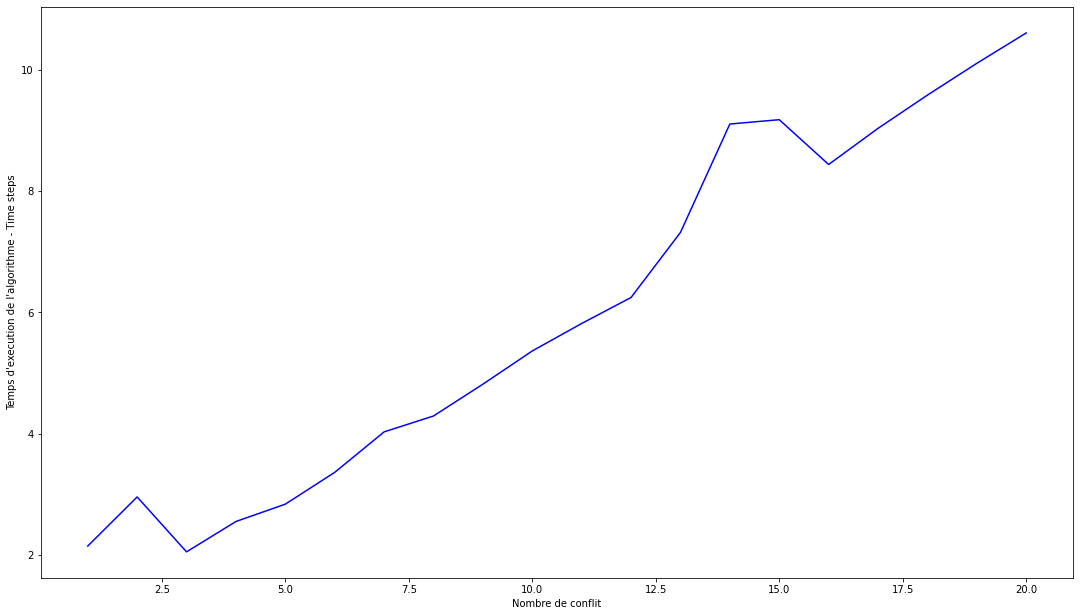

In [140]:
import numpy as np
import time
import matplotlib.pyplot as plt

x = np.linspace(1,20,20)
y = []
T_max = 100
for i in range(len(x)) :
  list_tasks = {'T1': (80.88147193690499, 38)}
  list_robots = {'R1': (37.26191821043129, 3),
 'R2': (91.12863440416477, 72),
 'R3': (80, 48),
 'R4': (70.97440611196498, 99),
 'R5': (95.67771224753184, 77),
 'R6': (63.32196933581883, 46),
 'R7': (55.56998647202327, 100),
 'R8': (10.43861187575147, 26),
 'R9': (31.445674622001697, 57),
 'R10': (56.75671158884044, 20),
 'R11': (2.4482597933774275, 80),
 'R12': (32.15349849473439, 56),
 'R13': (5.184133057595042, 42),
 'R14': (19.00093887716302, 86),
 'R15': (9.14072554853348, 14),
 'R16': (9.14072554853348, 20),
 'R17': (20, 20),
 'R18': (10, 20),
 'R19': (15, 20),
 'R20': (9, 20)}
  list_allocation = {'T1': [('R1', 95)]}
  if i >=1 :  
    L = list_allocation["T1"]   
    for k in range(2,i+2) :
      L.append(('R'+str(k),95))
    list_allocation["T1"] = L
  list_battery = {'R1': 6,
 'R2': 12, 'R3': 33, 'R4': 82, 'R5': 5, 'R6': 85,
 'R7': 49,
 'R8': 28,
 'R9': 69,
 'R10': 16,
 'R11': 67,
 'R12': 23,
 'R13': 96,
 'R14': 1,
 'R15': 67,
 'R16': 16,
 'R17': 67,
 'R18': 23,
 'R19': 96,
 'R20': 1,}
  start_time = time.time()
  general_func(0.33,0.33,0.33,list_tasks,list_battery,list_robots,list_allocation,T_max,100)
  y.append((time.time() - start_time)*100000)
plt.plot(x, y,'b')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Nombre de conflit')
plt.ylabel("Temps d'execution de l'algorithme - Time steps")
plt.show()

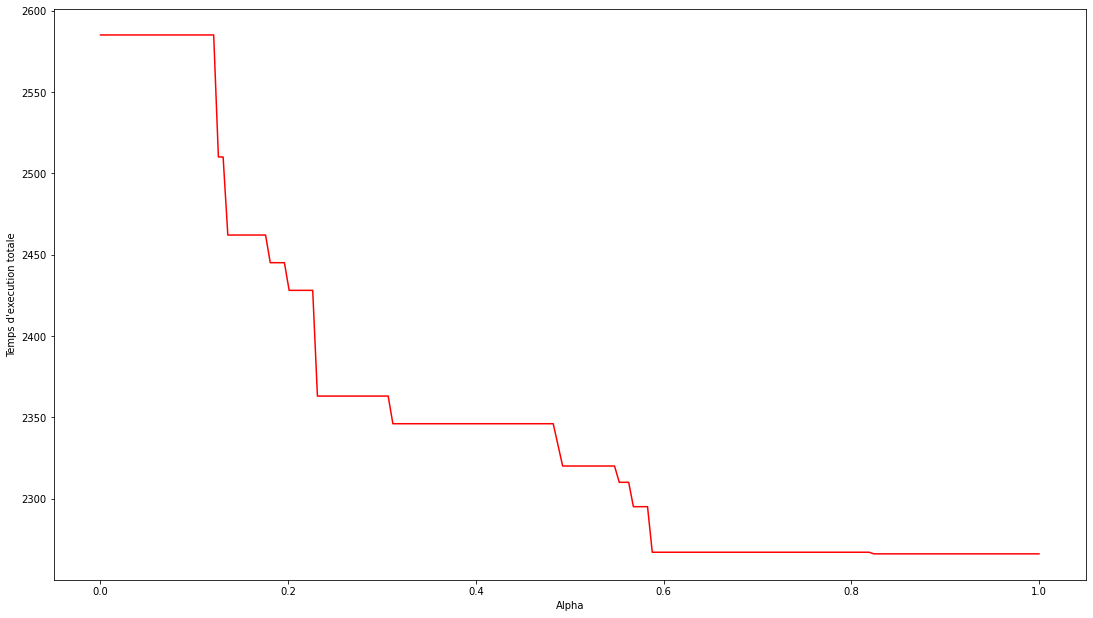

In [164]:
import numpy as np
x = np.linspace(0.0001,1,200)
y = []
d_max = 100
T_max = 100
for alpha in x :
  list_tasks = {'T1': (80.88147193690499, 38),
 'T2': (78.10548599619733, 37),
 'T3': (56.8176146374026, 70),
 'T4': (71.82255047676631, 53),
 'T5': (50.57013243716313, 85),
 'T6': (8.487020827987346, 44),
 'T7': (3.687324876871634, 100),
 'T8': (46.036596968210276, 91),
 'T9': (51.739543589066464, 63),
 'T10': (4.4709542768266335, 66),
 'T11': (45.76457021042237, 79),
 'T12': (38.777878883708475, 58),
 'T13': (69.64960295397435, 87),
 'T14': (48.48684975493916, 77),
 'T15': (60.1381733683944, 93),
 'T16': (96.79707555124712, 100),
 'T17': (98.7827657800577, 74),
 'T18': (54.044844675854705, 62),
 'T19': (68.47999943000718, 73),
 'T20': (63.33439774634873, 32),
 'T21': (62.74856924245211, 32),
 'T22': (66.01759734839521, 7),
 'T23': (1.1471855451022805, 52),
 'T24': (91.59190748689802, 55),
 'T25': (35.93284333519174, 24),
 'T26': (20.083137768266024, 3),
 'T27': (52.17236559757006, 57),
 'T28': (93.27819802845372, 100),
 'T29': (67.51522084747941, 68),
 'T30': (47.04049877673236, 64),
 'T31': (35.02137569578472, 93),
 'T32': (10.545883091737485, 45),
 'T33': (25.57265259651773, 94),
 'T34': (86.60755981495221, 29),
 'T35': (22.144407883961147, 44),
 'T36': (41.672688192694494, 30),
 'T37': (6.099921575386991, 62),
 'T38': (15.963149657443354, 42),
 'T39': (90.82048384733025, 91),
 'T40': (49.55579393454589, 34),
 'T41': (32.444862051741865, 32),
 'T42': (23.28872500249829, 37),
 'T43': (48.80234433062056, 48),
 'T44': (78.03931365092028, 43),
 'T45': (71.76874711716896, 36),
 'T46': (53.314887016819725, 68),
 'T47': (82.36458166940965, 66),
 'T48': (70.56753954274501, 94),
 'T49': (47.56847753653343, 30),
 'T50': (55.17533177803523, 67)}

  list_robots = {'R1': (37.26191821043129, 3),
 'R2': (91.12863440416477, 72),
 'R3': (48.99455320431827, 48),
 'R4': (70.97440611196498, 99),
 'R5': (95.67771224753184, 77),
 'R6': (63.32196933581883, 46),
 'R7': (55.56998647202327, 100),
 'R8': (10.43861187575147, 26),
 'R9': (31.445674622001697, 57),
 'R10': (56.75671158884044, 20),
 'R11': (2.4482597933774275, 80),
 'R12': (32.15349849473439, 56),
 'R13': (5.184133057595042, 42),
 'R14': (19.00093887716302, 86),
 'R15': (9.14072554853348, 14)}
 
  list_allocation = {'T1': [('R10', 95), ('R3', 96)],
 'T2': [('R9', 43)],
 'T3': [('R6', 35)],
 'T4': [('R5', 23)],
 'T5': [('R3', 0)],
 'T6': [('R13', 28), ('R3', 63)],
 'T7': [('R12', 100)],
 'T8': [('R15', 39), ('R10', 26)],
 'T9': [('R10', 80), ('R4', 95)],
 'T10': [('R10', 1), ('R10', 39)],
 'T11': [('R12', 62), ('R2', 28)],
 'T12': [('R6', 18), ('R10', 38)],
 'T13': [('R3', 18)],
 'T14': [('R5', 74)],
 'T15': [('R13', 18)],
 'T16': [('R14', 66)],
 'T17': [('R8', 70), ('R2', 46)],
 'T18': [('R4', 16), ('R2', 64)],
 'T19': [('R12', 76), ('R11', 93)],
 'T20': [('R3', 46), ('R13', 2)],
 'T21': [('R12', 67), ('R9', 61)],
 'T22': [('R14', 53)],
 'T23': [('R3', 43)],
 'T24': [('R2', 94)],
 'T25': [('R8', 87), ('R3', 74)],
 'T26': [('R7', 31)],
 'T27': [('R2', 33)],
 'T28': [('R3', 97), ('R3', 73)],
 'T29': [('R13', 81), ('R4', 57)],
 'T30': [('R13', 66)],
 'T31': [('R9', 37)],
 'T32': [('R3', 77)],
 'T33': [('R2', 23)],
 'T34': [('R9', 35), ('R13', 83)],
 'T35': [('R2', 89)],
 'T36': [('R10', 3)],
 'T37': [('R1', 86), ('R3', 11)],
 'T38': [('R12', 98), ('R1', 50)],
 'T39': [('R7', 6)],
 'T40': [('R14', 22), ('R6', 50)],
 'T41': [('R7', 90)],
 'T42': [('R3', 39)],
 'T43': [('R7', 84)],
 'T44': [('R3', 98)],
 'T45': [('R4', 0)],
 'T46': [('R15', 31)],
 'T47': [('R15', 18)],
 'T48': [('R10', 58)],
 'T49': [('R1', 85), ('R3', 75)],
 'T50': [('R2', 18), ('R7', 83)]}

  list_battery = {'R1': 6,
 'R2': 12,
 'R3': 33,
 'R4': 82,
 'R5': 5,
 'R6': 85,
 'R7': 49,
 'R8': 28,
 'R9': 69,
 'R10': 16,
 'R11': 67,
 'R12': 23,
 'R13': 96,
 'R14': 1,
 'R15': 67}
  beta = (1-alpha)/3
  gamma = (1-alpha)/3
  temps = general_func(alpha,beta,gamma,list_tasks,list_battery,list_robots,list_allocation,T_max,d_max)[2]
  y.append(temps)

plt.plot(x, y,'r')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Alpha')
plt.ylabel("Temps d'execution totale")
plt.show()

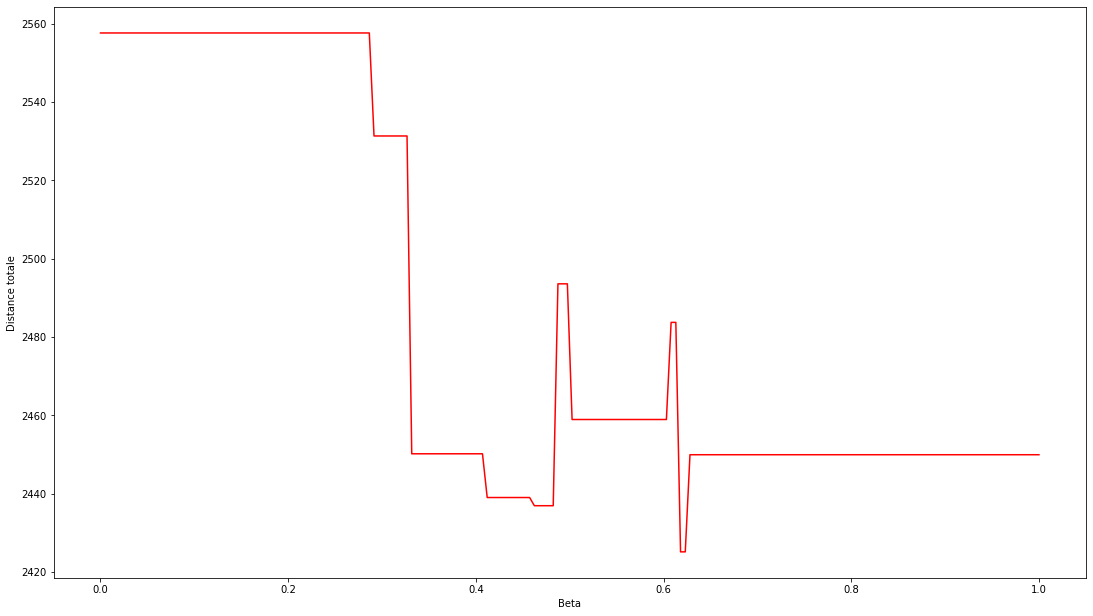

In [165]:
import numpy as np
x = np.linspace(0.0001,1,200)
y = []
d_max = 100
T_max = 100
for beta in x :
  list_tasks = {'T1': (80.88147193690499, 38),
 'T2': (78.10548599619733, 37),
 'T3': (56.8176146374026, 70),
 'T4': (71.82255047676631, 53),
 'T5': (50.57013243716313, 85),
 'T6': (8.487020827987346, 44),
 'T7': (3.687324876871634, 100),
 'T8': (46.036596968210276, 91),
 'T9': (51.739543589066464, 63),
 'T10': (4.4709542768266335, 66),
 'T11': (45.76457021042237, 79),
 'T12': (38.777878883708475, 58),
 'T13': (69.64960295397435, 87),
 'T14': (48.48684975493916, 77),
 'T15': (60.1381733683944, 93),
 'T16': (96.79707555124712, 100),
 'T17': (98.7827657800577, 74),
 'T18': (54.044844675854705, 62),
 'T19': (68.47999943000718, 73),
 'T20': (63.33439774634873, 32),
 'T21': (62.74856924245211, 32),
 'T22': (66.01759734839521, 7),
 'T23': (1.1471855451022805, 52),
 'T24': (91.59190748689802, 55),
 'T25': (35.93284333519174, 24),
 'T26': (20.083137768266024, 3),
 'T27': (52.17236559757006, 57),
 'T28': (93.27819802845372, 100),
 'T29': (67.51522084747941, 68),
 'T30': (47.04049877673236, 64),
 'T31': (35.02137569578472, 93),
 'T32': (10.545883091737485, 45),
 'T33': (25.57265259651773, 94),
 'T34': (86.60755981495221, 29),
 'T35': (22.144407883961147, 44),
 'T36': (41.672688192694494, 30),
 'T37': (6.099921575386991, 62),
 'T38': (15.963149657443354, 42),
 'T39': (90.82048384733025, 91),
 'T40': (49.55579393454589, 34),
 'T41': (32.444862051741865, 32),
 'T42': (23.28872500249829, 37),
 'T43': (48.80234433062056, 48),
 'T44': (78.03931365092028, 43),
 'T45': (71.76874711716896, 36),
 'T46': (53.314887016819725, 68),
 'T47': (82.36458166940965, 66),
 'T48': (70.56753954274501, 94),
 'T49': (47.56847753653343, 30),
 'T50': (55.17533177803523, 67)}

  list_robots = {'R1': (37.26191821043129, 3),
 'R2': (91.12863440416477, 72),
 'R3': (48.99455320431827, 48),
 'R4': (70.97440611196498, 99),
 'R5': (95.67771224753184, 77),
 'R6': (63.32196933581883, 46),
 'R7': (55.56998647202327, 100),
 'R8': (10.43861187575147, 26),
 'R9': (31.445674622001697, 57),
 'R10': (56.75671158884044, 20),
 'R11': (2.4482597933774275, 80),
 'R12': (32.15349849473439, 56),
 'R13': (5.184133057595042, 42),
 'R14': (19.00093887716302, 86),
 'R15': (9.14072554853348, 14)}
 
  list_allocation = {'T1': [('R10', 95), ('R3', 96)],
 'T2': [('R9', 43)],
 'T3': [('R6', 35)],
 'T4': [('R5', 23)],
 'T5': [('R3', 0)],
 'T6': [('R13', 28), ('R3', 63)],
 'T7': [('R12', 100)],
 'T8': [('R15', 39), ('R10', 26)],
 'T9': [('R10', 80), ('R4', 95)],
 'T10': [('R10', 1), ('R10', 39)],
 'T11': [('R12', 62), ('R2', 28)],
 'T12': [('R6', 18), ('R10', 38)],
 'T13': [('R3', 18)],
 'T14': [('R5', 74)],
 'T15': [('R13', 18)],
 'T16': [('R14', 66)],
 'T17': [('R8', 70), ('R2', 46)],
 'T18': [('R4', 16), ('R2', 64)],
 'T19': [('R12', 76), ('R11', 93)],
 'T20': [('R3', 46), ('R13', 2)],
 'T21': [('R12', 67), ('R9', 61)],
 'T22': [('R14', 53)],
 'T23': [('R3', 43)],
 'T24': [('R2', 94)],
 'T25': [('R8', 87), ('R3', 74)],
 'T26': [('R7', 31)],
 'T27': [('R2', 33)],
 'T28': [('R3', 97), ('R3', 73)],
 'T29': [('R13', 81), ('R4', 57)],
 'T30': [('R13', 66)],
 'T31': [('R9', 37)],
 'T32': [('R3', 77)],
 'T33': [('R2', 23)],
 'T34': [('R9', 35), ('R13', 83)],
 'T35': [('R2', 89)],
 'T36': [('R10', 3)],
 'T37': [('R1', 86), ('R3', 11)],
 'T38': [('R12', 98), ('R1', 50)],
 'T39': [('R7', 6)],
 'T40': [('R14', 22), ('R6', 50)],
 'T41': [('R7', 90)],
 'T42': [('R3', 39)],
 'T43': [('R7', 84)],
 'T44': [('R3', 98)],
 'T45': [('R4', 0)],
 'T46': [('R15', 31)],
 'T47': [('R15', 18)],
 'T48': [('R10', 58)],
 'T49': [('R1', 85), ('R3', 75)],
 'T50': [('R2', 18), ('R7', 83)]}

  list_battery = {'R1': 6,
 'R2': 12,
 'R3': 33,
 'R4': 82,
 'R5': 5,
 'R6': 85,
 'R7': 49,
 'R8': 28,
 'R9': 69,
 'R10': 16,
 'R11': 67,
 'R12': 23,
 'R13': 96,
 'R14': 1,
 'R15': 67}
  alpha = (1-beta)/3
  gamma = (1-beta)/3
  temps = general_func(alpha,beta,gamma,list_tasks,list_battery,list_robots,list_allocation,T_max,d_max)[1]
  y.append(temps)

plt.plot(x, y,'r')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Beta')
plt.ylabel("Distance totale")
plt.show()

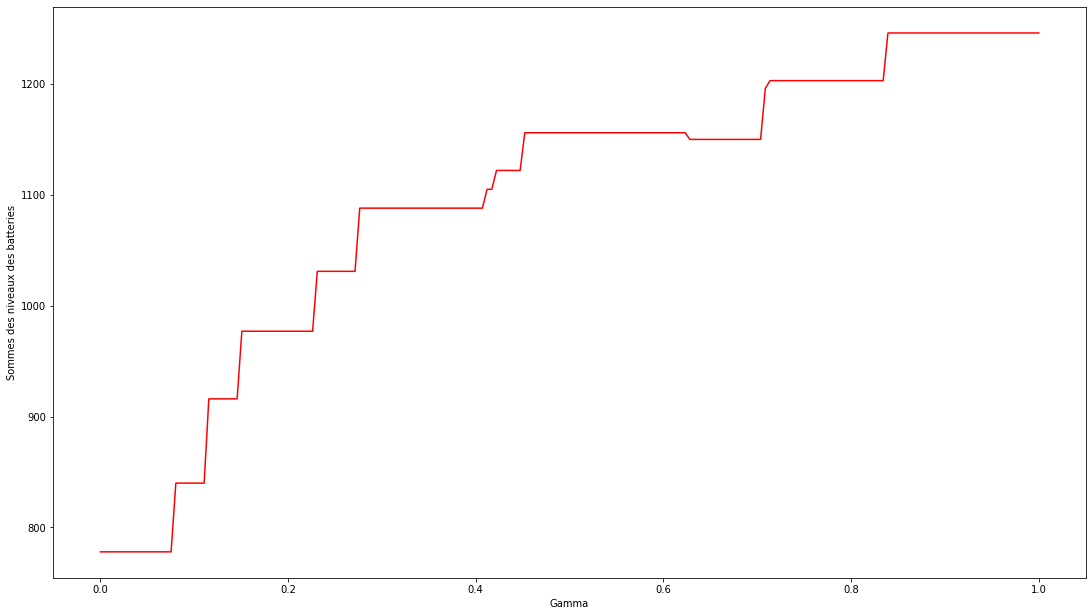

In [166]:
import numpy as np
x = np.linspace(0.0001,1,200)
y = []
for i in x :
  latency_max = 1
  d_max = 100
  T_max = 100
  list_tasks = {'T1': (80.88147193690499, 38),
 'T2': (78.10548599619733, 37),
 'T3': (56.8176146374026, 70),
 'T4': (71.82255047676631, 53),
 'T5': (50.57013243716313, 85),
 'T6': (8.487020827987346, 44),
 'T7': (3.687324876871634, 100),
 'T8': (46.036596968210276, 91),
 'T9': (51.739543589066464, 63),
 'T10': (4.4709542768266335, 66),
 'T11': (45.76457021042237, 79),
 'T12': (38.777878883708475, 58),
 'T13': (69.64960295397435, 87),
 'T14': (48.48684975493916, 77),
 'T15': (60.1381733683944, 93),
 'T16': (96.79707555124712, 100),
 'T17': (98.7827657800577, 74),
 'T18': (54.044844675854705, 62),
 'T19': (68.47999943000718, 73),
 'T20': (63.33439774634873, 32),
 'T21': (62.74856924245211, 32),
 'T22': (66.01759734839521, 7),
 'T23': (1.1471855451022805, 52),
 'T24': (91.59190748689802, 55),
 'T25': (35.93284333519174, 24),
 'T26': (20.083137768266024, 3),
 'T27': (52.17236559757006, 57),
 'T28': (93.27819802845372, 100),
 'T29': (67.51522084747941, 68),
 'T30': (47.04049877673236, 64),
 'T31': (35.02137569578472, 93),
 'T32': (10.545883091737485, 45),
 'T33': (25.57265259651773, 94),
 'T34': (86.60755981495221, 29),
 'T35': (22.144407883961147, 44),
 'T36': (41.672688192694494, 30),
 'T37': (6.099921575386991, 62),
 'T38': (15.963149657443354, 42),
 'T39': (90.82048384733025, 91),
 'T40': (49.55579393454589, 34),
 'T41': (32.444862051741865, 32),
 'T42': (23.28872500249829, 37),
 'T43': (48.80234433062056, 48),
 'T44': (78.03931365092028, 43),
 'T45': (71.76874711716896, 36),
 'T46': (53.314887016819725, 68),
 'T47': (82.36458166940965, 66),
 'T48': (70.56753954274501, 94),
 'T49': (47.56847753653343, 30),
 'T50': (55.17533177803523, 67)}

  list_robots = {'R1': (37.26191821043129, 3),
 'R2': (91.12863440416477, 72),
 'R3': (48.99455320431827, 48),
 'R4': (70.97440611196498, 99),
 'R5': (95.67771224753184, 77),
 'R6': (63.32196933581883, 46),
 'R7': (55.56998647202327, 100),
 'R8': (10.43861187575147, 26),
 'R9': (31.445674622001697, 57),
 'R10': (56.75671158884044, 20),
 'R11': (2.4482597933774275, 80),
 'R12': (32.15349849473439, 56),
 'R13': (5.184133057595042, 42),
 'R14': (19.00093887716302, 86),
 'R15': (9.14072554853348, 14)}
 
  list_allocation = {'T1': [('R10', 95), ('R3', 96)],
 'T2': [('R9', 43)],
 'T3': [('R6', 35)],
 'T4': [('R5', 23)],
 'T5': [('R3', 0)],
 'T6': [('R13', 28), ('R3', 63)],
 'T7': [('R12', 100)],
 'T8': [('R15', 39), ('R10', 26)],
 'T9': [('R10', 80), ('R4', 95)],
 'T10': [('R10', 1), ('R10', 39)],
 'T11': [('R12', 62), ('R2', 28)],
 'T12': [('R6', 18), ('R10', 38)],
 'T13': [('R3', 18)],
 'T14': [('R5', 74)],
 'T15': [('R13', 18)],
 'T16': [('R14', 66)],
 'T17': [('R8', 70), ('R2', 46)],
 'T18': [('R4', 16), ('R2', 64)],
 'T19': [('R12', 76), ('R11', 93)],
 'T20': [('R3', 46), ('R13', 2)],
 'T21': [('R12', 67), ('R9', 61)],
 'T22': [('R14', 53)],
 'T23': [('R3', 43)],
 'T24': [('R2', 94)],
 'T25': [('R8', 87), ('R3', 74)],
 'T26': [('R7', 31)],
 'T27': [('R2', 33)],
 'T28': [('R3', 97), ('R3', 73)],
 'T29': [('R13', 81), ('R4', 57)],
 'T30': [('R13', 66)],
 'T31': [('R9', 37)],
 'T32': [('R3', 77)],
 'T33': [('R2', 23)],
 'T34': [('R9', 35), ('R13', 83)],
 'T35': [('R2', 89)],
 'T36': [('R10', 3)],
 'T37': [('R1', 86), ('R3', 11)],
 'T38': [('R12', 98), ('R1', 50)],
 'T39': [('R7', 6)],
 'T40': [('R14', 22), ('R6', 50)],
 'T41': [('R7', 90)],
 'T42': [('R3', 39)],
 'T43': [('R7', 84)],
 'T44': [('R3', 98)],
 'T45': [('R4', 0)],
 'T46': [('R15', 31)],
 'T47': [('R15', 18)],
 'T48': [('R10', 58)],
 'T49': [('R1', 85), ('R3', 75)],
 'T50': [('R2', 18), ('R7', 83)]}

  list_battery = {'R1': 6,
 'R2': 12,
 'R3': 33,
 'R4': 82,
 'R5': 5,
 'R6': 85,
 'R7': 49,
 'R8': 28,
 'R9': 69,
 'R10': 16,
 'R11': 67,
 'R12': 23,
 'R13': 96,
 'R14': 1,
 'R15': 67}
  alpha = (1-i)/3
  beta = (1-i)/3
  #dis, tmp = general_func(0.5,alpha,0.5,0.5,list_tasks,list_battery,list_latency,list_robots,list_allocation,T_max,d_max,latency_max)
  battery = general_func(alpha,beta,i,list_tasks,list_battery,list_robots,list_allocation,T_max,d_max)[3]
  y.append(battery)

plt.plot(x, y,'r')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Gamma')
plt.ylabel('Sommes des niveaux des batteries')
plt.show()